## 1) Traer DataSets dfBusinessML1 y reviews de Yelp

### 1.1) Dataset dfBusinessML1

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 

In [12]:
# Data Frame De Business Filtrado
businessML1 = 'dataBusinesML1.csv'
# Lee el archivo CSV en un DataFrame
dfBusinessML1 = pd.read_csv(businessML1)
dfBusinessML1

,Acai Bowls,Asian Fusion,Barbeque,Buffets,Burgers,Cafes,Cafeteria,Cajun/Creole,Chicken Wings,Child Care & Day Care,...,Specialty Food,Steakhouses,Tacos,Vegan,Vegetarian,business_id,name,address,city,state
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Y5gyxnQt44B3axgzrjttlw,Don Cruz Snowballs,4213 Williams Blvd,Kenner,FL
13874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,CA
13875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,670 Central Ave,St. Petersburg,FL
13876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,CA


### 1.2) Dataset reviews.json

In [13]:
rutaReview= "review.json"
dfReviewYelp = pd.read_json(rutaReview, lines=True, nrows=100000)
dfReviewYelp['date'] = pd.to_datetime(dfReviewYelp['date']).dt.strftime('%d-%m-%Y')
dfReviewYelp['user_id'] = dfReviewYelp['user_id'].str.strip()
dfReviewYelp['review_id'] = dfReviewYelp['review_id'].str.strip()
dfReviewYelp['votos'] = dfReviewYelp['useful'] + dfReviewYelp['funny'] + dfReviewYelp['cool']
dfReviewYelp = dfReviewYelp.drop(columns=['funny', 'useful', 'cool'])
dfReviewYelp = dfReviewYelp[['business_id','stars']]
dfReviewYelp

,business_id,stars
0,XQfwVwDr-v0ZS3_CbbE5Xw,3
1,7ATYjTIgM3jUlt4UM3IypQ,5
2,YjUWPpI6HXG530lwP-fb2A,3
3,kxX2SOes4o-D3ZQBkiMRfA,5
4,e4Vwtrqf-wpJfwesgvdgxQ,4
...,...,...
99995,lV0k3BnslFRkuWD_kbKd0Q,4
99996,G0xz3kyRhRi6oZl7KfR0pA,1
99997,C4lZdhasjZVQyDlOiXY1sA,4
99998,dChRGpit9fM_kZK5pafNyA,2


### 1.3) Unión de Tablas

In [14]:
# Union de tablas
merge1 = dfBusinessML1.merge(dfReviewYelp, on='business_id', how='inner')
#Dummies Ciudad
merge2 = pd.get_dummies(merge1, columns=['city'])
mergeBusinessMl1ReviewYelp= merge2.drop(columns=['business_id', 'name','address','state'])
mergeBusinessMl1ReviewYelp = mergeBusinessMl1ReviewYelp.astype(int)
mergeBusinessMl1ReviewYelp

,Acai Bowls,Asian Fusion,Barbeque,Buffets,Burgers,Cafes,Cafeteria,Cajun/Creole,Chicken Wings,Child Care & Day Care,...,city_Willingboro Township,city_Willow Grove,city_Wilmington,city_Wimauma,city_Woodbury,city_Woodstown,city_Wynnewood,city_Yardley,city_Zephyrhills,city_Zionsville
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2) EDA

### 2.1) Calificación de las 10 primeras ciudades

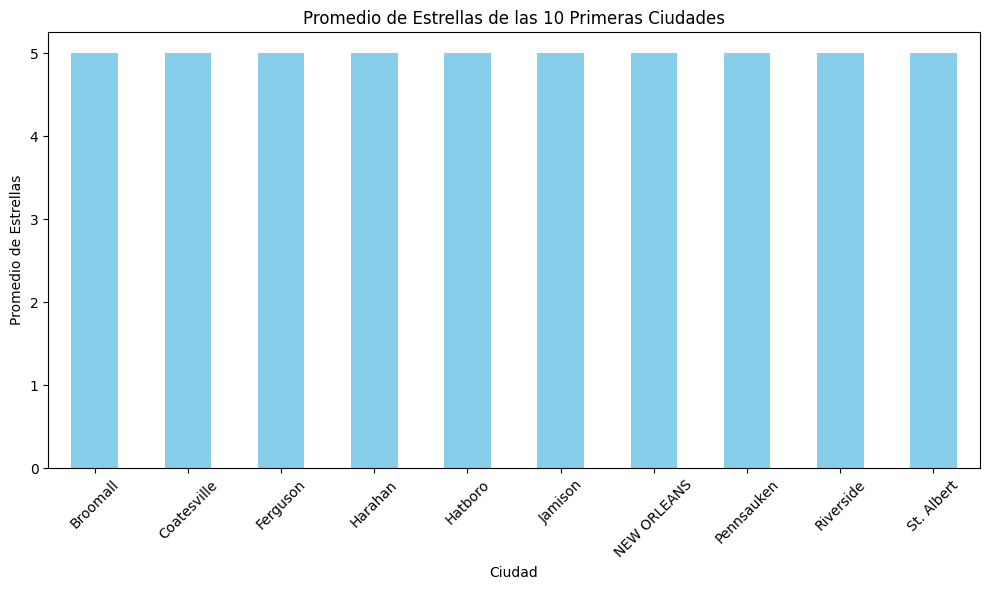

In [15]:
# Agrupar por ciudad y calcular el promedio de estrellas
promedio_estrellas_por_ciudad = merge1.groupby('city')['stars'].mean()

# Seleccionar las 10 primeras ciudades por su promedio de estrellas
top_10_ciudades = promedio_estrellas_por_ciudad.nlargest(10)

# Graficar el promedio de estrellas de las 10 primeras ciudades
plt.figure(figsize=(10, 6))
top_10_ciudades.plot(kind='bar', color='skyblue')
plt.xlabel('Ciudad')
plt.ylabel('Promedio de Estrellas')
plt.title('Promedio de Estrellas de las 10 Primeras Ciudades')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()

### 2.2) Distribución promedio calificación en funcion de las estrellas de todas las ciudades

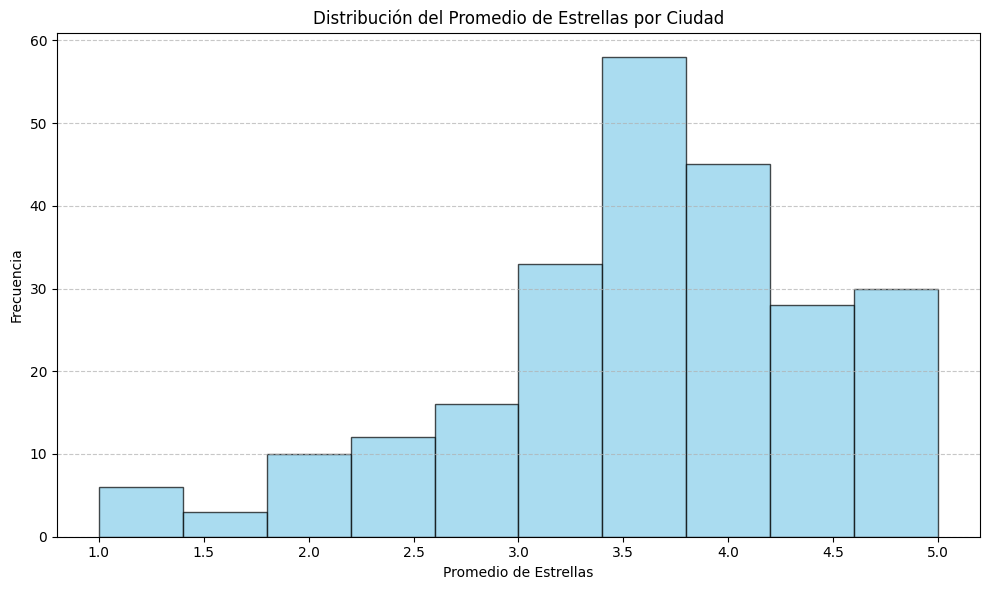

In [16]:
# Obtener el promedio de estrellas por ciudad
promedio_estrellas_por_ciudad = merge1.groupby('city')['stars'].mean()

# Graficar la distribución del promedio de estrellas por ciudad
plt.figure(figsize=(10, 6))
plt.hist(promedio_estrellas_por_ciudad, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Promedio de Estrellas')
plt.ylabel('Frecuencia')
plt.title('Distribución del Promedio de Estrellas por Ciudad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()

### 2.3) Promedio de estrellas de 10 mejores negocios

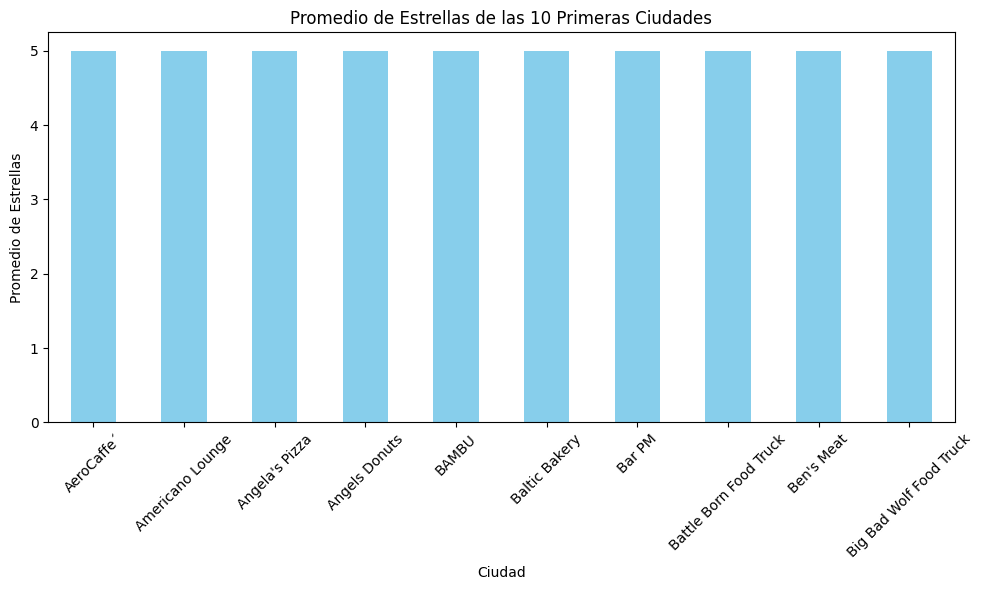

In [17]:
# Agrupar por ciudad y calcular el promedio de estrellas
promedio_estrellas_por_ciudad = merge1.groupby('name')['stars'].mean()

# Seleccionar las 10 primeras ciudades por su promedio de estrellas
top_10_ciudades = promedio_estrellas_por_ciudad.nlargest(10)

# Graficar el promedio de estrellas de las 10 primeras ciudades
plt.figure(figsize=(10, 6))
top_10_ciudades.plot(kind='bar', color='skyblue')
plt.xlabel('Ciudad')
plt.ylabel('Promedio de Estrellas')
plt.title('Promedio de Estrellas de las 10 Primeras Ciudades')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()

### 2.4) Top 10 de categorias de negocios de comidas mas populares

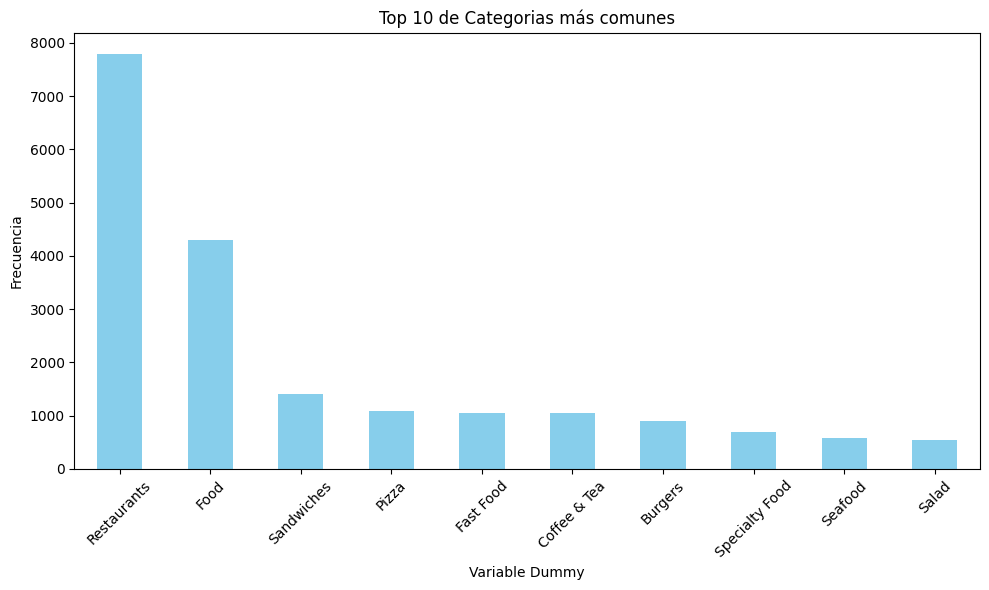

In [18]:
dfBusinessML1Grafica = dfBusinessML1
dfBusinessML1Grafica = dfBusinessML1Grafica.drop(columns=['business_id', 'name','address','state','city'])
top_10_variables_dummy = dfBusinessML1Grafica.sum().nlargest(10)

# Graficar el top 10 de variables dummy más comunes
plt.figure(figsize=(10, 6))
top_10_variables_dummy.plot(kind='bar', color='skyblue')
plt.xlabel('Variable Dummy')
plt.ylabel('Frecuencia')
plt.title('Top 10 de Categorias más comunes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()

Se tiene la hipotesis, que la calificación varia en funcion de algunas ciudades y caracteristicas asociadas al tipo de comida que vende el restaurante, por lo que se propone un modelo que puede predecir la combinacion entre ciudad, y 3 tipos de comidad que el restaurante debe vender para que pueda tener una mejor valoración por parte de los clientes

## 3) Construccion de Modelo de recomendación de Machine Learning

### 3.1) Primer modelo de regresión

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# mergeBusinessMl1ReviewYelp contiene las categorías, la ciudad y el número de estrellas de los restaurantes


# Leer el DataFrame 'df' desde tu fuente de datos
# ...

# Definir las categorías y la ciudad
categorias = ['Pizza', 'Burgers', 'Cafes'] 
ciudad = 'Boise'


X = mergeBusinessMl1ReviewYelp.drop(columns=['stars'])
y = mergeBusinessMl1ReviewYelp['stars']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo1 de regresión lineal
modelo1 = LinearRegression()
modelo1.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = modelo1.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Mostrar los coeficientes del modelo1
print("Coeficientes del modelo1:")
for nombre, coeficiente in zip(X.columns, modelo1.coef_):
    print(f"{nombre}: {coeficiente}")

# Mostrar el coeficiente de intercepción del modelo1
print("Intercepción del modelo1:", modelo1.intercept_)

Error cuadrático medio (MSE): 1.0621917918545297e+22
Coeficientes del modelo1:
Acai Bowls: -0.2965877817639221
Asian Fusion: 0.0435618004450227
Barbeque: -0.3453047023953601
Buffets: -0.8783112213890705
Burgers: -0.25645452188588724
Cafes: 0.11581082743593075
Cafeteria: -0.26816158998244227
Cajun/Creole: -0.16349134982273897
Chicken Wings: -0.5987235581474888
Child Care & Day Care: 0.6956987425829466
Coffee & Tea: -0.23530222097220507
Coffee & Tea Supplies: -11180485314072.053
Coffee Roasteries: 0.47936360136469713
Comfort Food: 0.2671374991961315
Comic Books: -1.5679321734862564
Donuts: 0.5403123098327758
Empanadas: 40291532239885.6
Fast Food: -0.4536617326436535
Food: 0.21133972606262524
Food Court: -17853484009720.883
Food Delivery Services: -0.12563561061458328
Food Stands: 0.5267622645254744
Food Tours: 0.9975190462563626
Food Trucks: 0.33302563187178813
Juice Bars & Smoothies: -0.2710333068333257
Junk Removal & Hauling: 1.145079740091854
Lounges: -0.3054085155300673
Pizza: -0.203

### Se decarta el modelo por que tiene un erro Medio mu al alto 

### 3.2) Segundo modelo de árbol de decisión

El siguiente algoritmo de Machine Learing esta construido bajo el modelo de árboles de decisión que permite saber si la ubicación (ciudad), y 3 tipos de caracteristicas del restaurante, seran aceptados por los clientes, es decir, tendrá un alto grado de estrellas, lo que indicara una buena recomendación

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Leer el DataFrame 'df' desde tu fuente de datos
# ...

# Definir las categorías y la ciudad
categorias = ['Pizza', 'Burgers', 'Cafes'] 
ciudad = 'Boise'

X = mergeBusinessMl1ReviewYelp.drop(columns=['stars'])
y = mergeBusinessMl1ReviewYelp['stars']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisión
modelo = DecisionTreeRegressor()
modelo.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Mostrar la importancia de las características
print("Importancia de las características:")
for nombre, importancia in zip(X.columns, modelo.feature_importances_):
    print(f"{nombre}: {importancia}")

Error cuadrático medio (MSE): 1.6326173413498948
Importancia de las características:
Acai Bowls: 0.0028584545109962673
Asian Fusion: 0.005002003538938124
Barbeque: 0.012432763389724558
Buffets: 0.027150115012640162
Burgers: 0.03777407456035347
Cafes: 0.00832006539380714
Cafeteria: 1.6928645361444689e-07
Cajun/Creole: 0.013903445949743716
Chicken Wings: 0.02316082595769836
Child Care & Day Care: 0.0
Coffee & Tea: 0.02387893477954042
Coffee & Tea Supplies: 0.0
Coffee Roasteries: 0.0289207289108876
Comfort Food: 0.0007810351049986095
Comic Books: 0.0
Donuts: 0.00020007634629726722
Empanadas: 0.0
Fast Food: 0.030382799163577133
Food: 0.023409641955512824
Food Court: 0.0
Food Delivery Services: 0.0025752137535129784
Food Stands: 0.0009718490944288113
Food Tours: 0.00672560428862136
Food Trucks: 0.0050279425596859535
Juice Bars & Smoothies: 0.004320087221561739
Junk Removal & Hauling: 0.0019423217986639044
Lounges: 0.0031251062756289636
Pizza: 0.028530180649872276
Pubs: 0.008348183912902795


In [21]:
df_predicciones = pd.DataFrame({'Valores reales': y_test, 'Predicciones': y_pred})

# Mostrar el DataFrame
print(df_predicciones)

       Valores reales  Predicciones
511                 4      4.291667
3679                4      3.949721
11792               5      3.685714
6662                5      3.898551
15264               5      4.769231
...               ...           ...
12391               5      4.333333
11102               2      3.935743
11863               3      3.685714
3418                3      3.775000
11997               5      3.961538

[3126 rows x 2 columns]


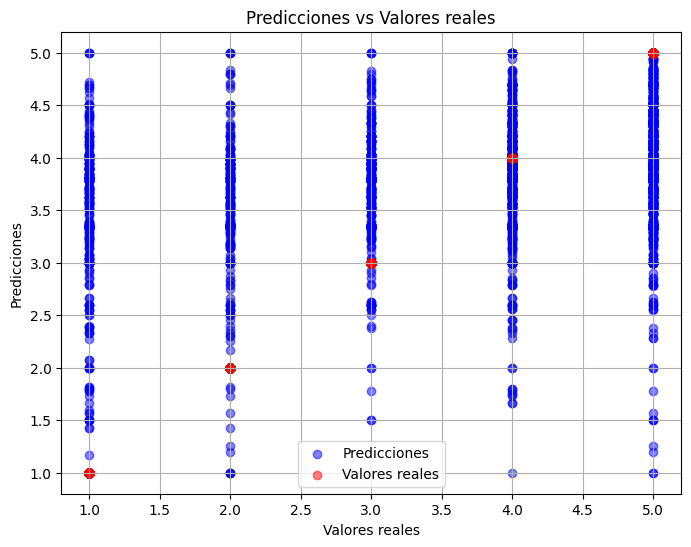

In [22]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs valores reales con diferentes colores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Predicciones')
plt.scatter(y_test, y_test, alpha=0.5, c='red', label='Valores reales')  # Valores reales
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.legend()
plt.grid(True)
plt.show()

In [23]:

import pandas as pd

def predecir_cantidad_estrellas(categorias, ciudad, modelo):
    # Crear un DataFrame con todas las características existentes
    datos = X_test.copy()
    
    # Establecer las características binarias correspondientes a las categorías y la ciudad
    for categoria in categorias:
        datos[categoria] = 1
    datos['city_' + ciudad] = 1
    
    # Predecir la cantidad de estrellas utilizando el modelo
    cantidad_estrellas = modelo.predict(datos)
    
    # Calcular el promedio de las predicciones
    promedio_estrellas = cantidad_estrellas.mean()
    return promedio_estrellas

# Ejemplo de uso
categorias = ['Pizza', 'Burgers', 'Cafes']
ciudad = 'Boise'
cantidad_estrellas = predecir_cantidad_estrellas(categorias, ciudad, modelo)
print(f"El promedio de estrellas pronosticado para las categorías {categorias} en la ciudad de {ciudad} es: {cantidad_estrellas}")

promedio_estrellas_por_ciudad = merge1.groupby('name')['stars'].mean().mean()
if cantidad_estrellas >= promedio_estrellas_por_ciudad:
    print("Invertir")
else:
    print("No invertir")

El promedio de estrellas pronosticado para las categorías ['Pizza', 'Burgers', 'Cafes'] en la ciudad de Boise es: 3.9582956716872286
Invertir
